--- Data Loaded Successfully ---

--- Basic Data Info ---
First 5 rows:
| gender   | race/ethnicity   | parental level of education   | lunch        | test preparation course   | math score   | reading score   | writing score   |
|:---------|:-----------------|:------------------------------|:-------------|:--------------------------|:-------------|:----------------|:----------------|
| female   | group B          | bachelor's degree             | standard     | none                      | 72           | 72              | 74              |
| female   | group C          | some college                  | standard     | completed                 | 69           | 90              | 88              |
| female   | group B          | master's degree               | standard     | none                      | 90           | 95              | 93              |
| male     | group A          | associate's degree            | free/reduced | none                      | 47           | 57              

<ipython-input-1-f796d228430b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
<ipython-input-1-f796d228430b>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=df, palette='pastel')
<ipython-input-1-f796d228430b>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=df, palette='pastel')


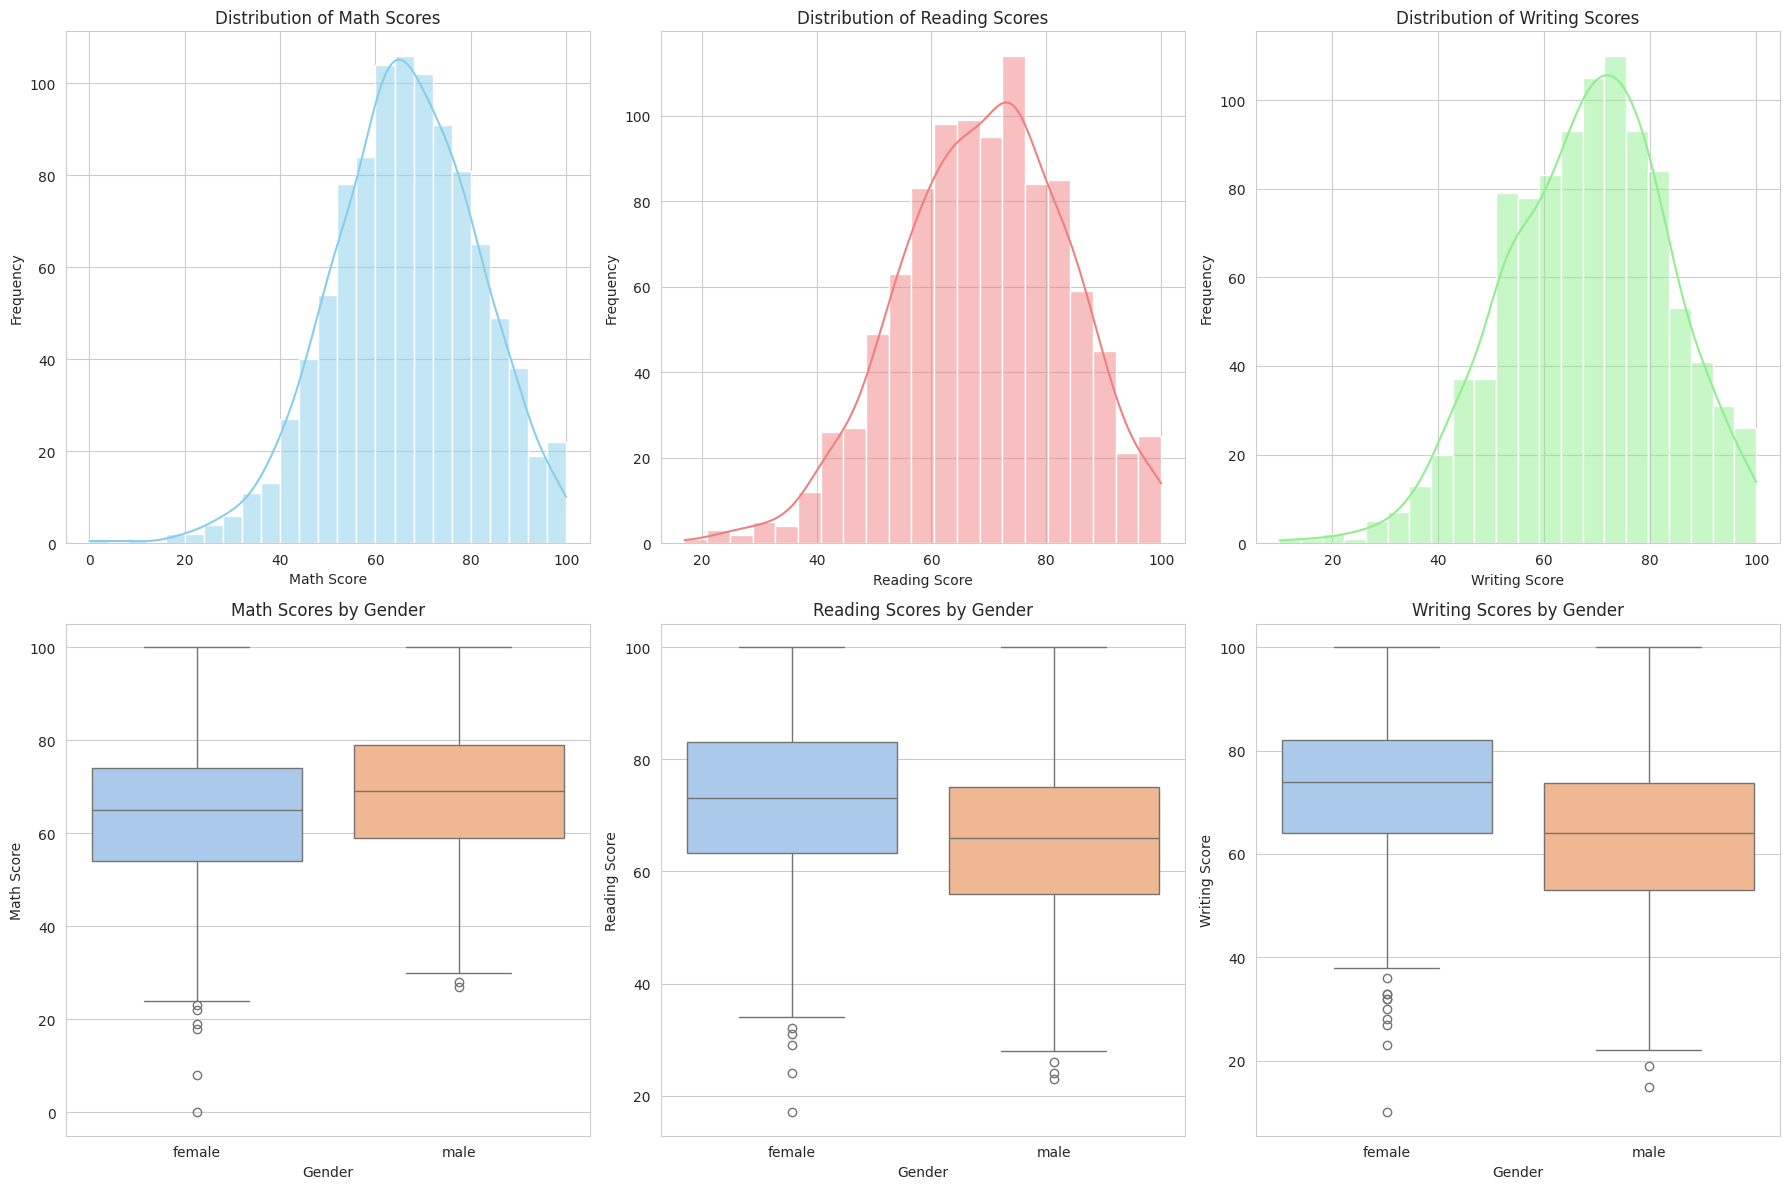

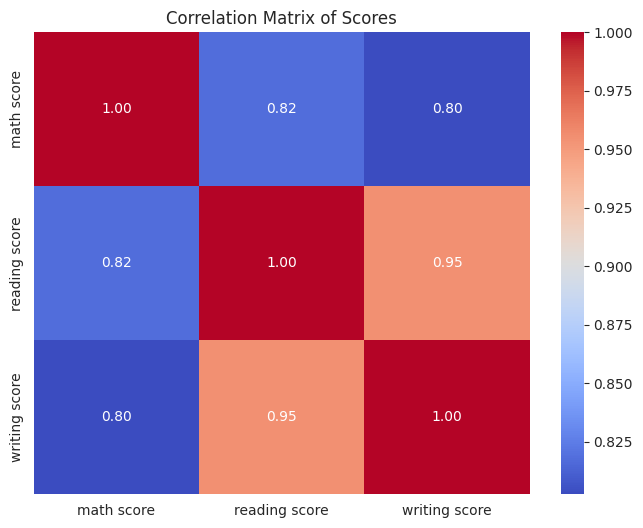


--- Performing Chi-Square Test ---

Contingency Table (Parental Education vs Test Prep):
| parental level of education   | completed   | none   |
|:------------------------------|:------------|:-------|
| associate's degree            | 82          | 140    |
| bachelor's degree             | 46          | 72     |
| high school                   | 56          | 140    |
| master's degree               | 20          | 39     |
| some college                  | 77          | 149    |
| some high school              | 77          | 102    |

Chi-Square Statistic: 9.5441
P-value: 0.0892
Degrees of Freedom: 5
Result: Fail to reject the null hypothesis. There is no statistically significant association.

--- Building a Simple Predictive Model (Linear Regression) ---

Splitting data: 800 training samples, 200 testing samples.
Training the Linear Regression model...
Model training complete.

--- Model Evaluation ---
Mean Squared Error (MSE): 29.0952
R-squared (R2 Score): 0.8804

--- Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, permutation_test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np


try:
    df = pd.read_csv('StudentsPerformance.csv')
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print("Error: 'StudentsPerformance.csv' not found. Please make sure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    exit()

print("\n--- Basic Data Info ---")
print("First 5 rows:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nDataset Info:")
df.info()
print("\nSummary Statistics (Numerical):")
print(df.describe().to_markdown(numalign="left", stralign="left"))
print("\nSummary Statistics (Categorical):")
print(df.describe(include='object').to_markdown(numalign="left", stralign="left"))
print("\nMissing Values:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\n--- Generating Visualizations ---")

sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(df['reading score'], kde=True, color='lightcoral')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(df['writing score'], kde=True, color='lightgreen')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')

plt.subplot(2, 3, 5)
sns.boxplot(x='gender', y='reading score', data=df, palette='pastel')
plt.title('Reading Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')

plt.subplot(2, 3, 6)
sns.boxplot(x='gender', y='writing score', data=df, palette='pastel')
plt.title('Writing Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scores')
plt.show()

print("\n--- Performing Chi-Square Test ---")
contingency_table = pd.crosstab(df['parental level of education'], df['test preparation course'])
print("\nContingency Table (Parental Education vs Test Prep):")
print(contingency_table.to_markdown(numalign="left", stralign="left"))

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Result: Reject the null hypothesis. There is a statistically significant association.")
else:
    print("Result: Fail to reject the null hypothesis. There is no statistically significant association.")

print("\n--- Building a Simple Predictive Model (Linear Regression) ---")

features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']
target = 'math score'

X = df[features]
y = df[target]

categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nSplitting data: {len(X_train)} training samples, {len(X_test)} testing samples.")

print("Training the Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")
print("\n--- Analysis Complete ---")


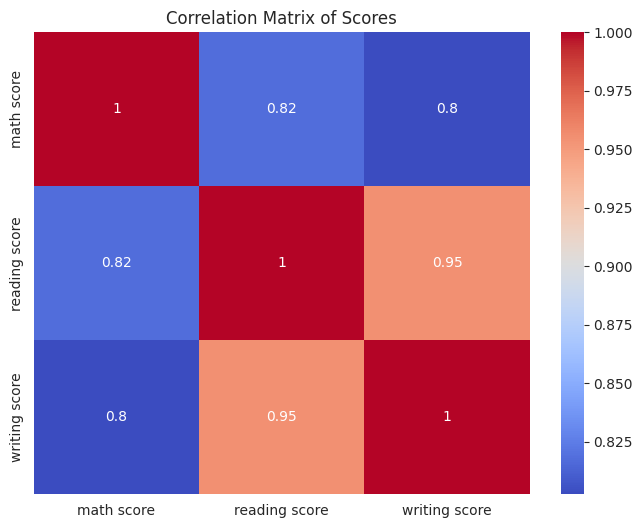

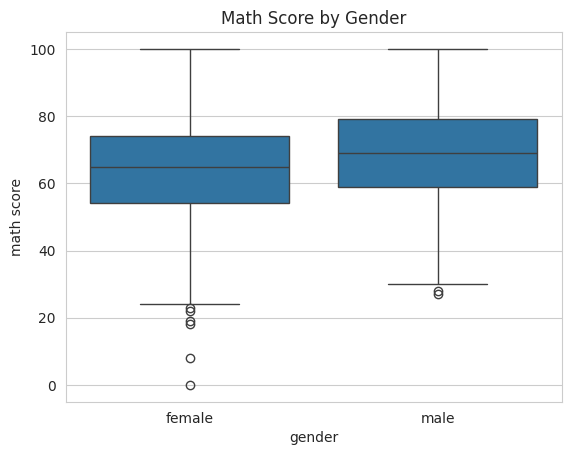

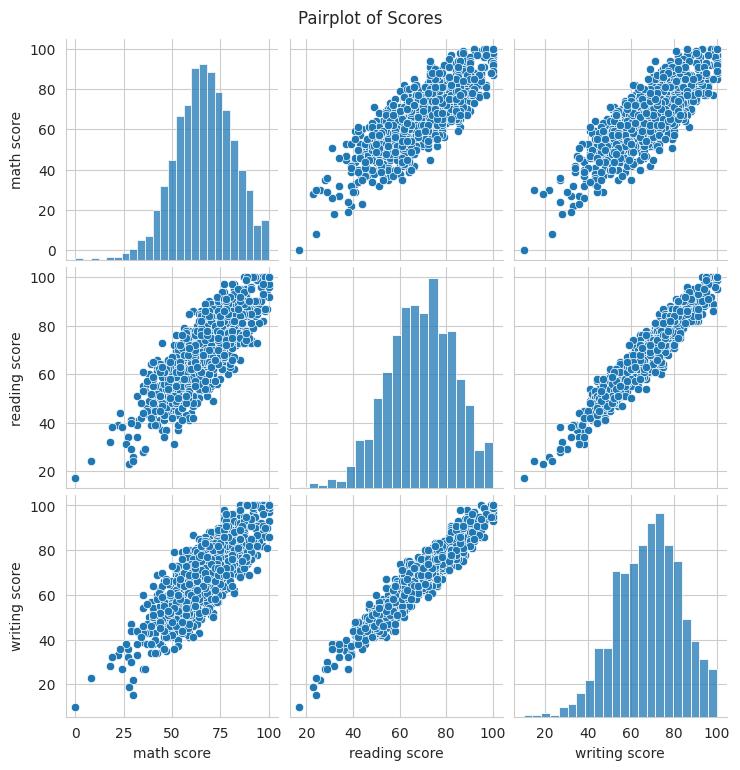

In [2]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Scores")
plt.show()

sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score by Gender")
plt.show()

sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Pairplot of Scores", y=1.02)
plt.show()


In [3]:
contingency = pd.crosstab(df['gender'], df['test preparation course'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test between gender and test preparation course:")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi-square test between gender and test preparation course:
Chi2 = 0.02, p-value = 0.9008


In [4]:
X = df.drop(['math score'], axis=1)
y = df['math score']

categorical = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='drop')


model = make_pipeline(preprocessor, LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R-square Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")


R-square Score: 0.18
RMSE: 14.16


In [5]:
model = smf.ols(
    'Q("math score") ~ C(gender) + C(Q("test preparation course")) + C(lunch)',
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Q("math score")   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     73.99
Date:                Thu, 08 May 2025   Prob (F-statistic):           3.29e-43
Time:                        20:35:52   Log-Likelihood:                -4036.7
No. Observations:                1000   AIC:                             8081.
Df Residuals:                     996   BIC:                             8101.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [6]:
def mean_diff(x, y):
    return abs(x.mean() - y.mean())

group1 = df[df['gender'] == 'male']['math score']
group2 = df[df['gender'] == 'female']['math score']

result = permutation_test((group1, group2), statistic=mean_diff, permutation_type='independent', n_resamples=10000)
print(f"Permutation test p-value: {result.pvalue:.4f}")


Permutation test p-value: 0.0002


In [7]:
from scipy.stats import chi2

full_model = smf.ols(
    'Q("math score") ~ C(gender) + C(Q("test preparation course")) + C(lunch)',
    data=df
).fit()

reduced_model = smf.ols(
    'Q("math score") ~ C(gender) + C(lunch)',
    data=df
).fit()

lr_stat = 2 * (full_model.llf - reduced_model.llf)
df_diff = full_model.df_model - reduced_model.df_model


p_value = chi2.sf(lr_stat, df_diff)
print(f"Likelihood Ratio Test: LR stat = {lr_stat:.2f}, df = {df_diff}, p-value = {p_value:.4f}")


Likelihood Ratio Test: LR stat = 40.00, df = 1.0, p-value = 0.0000


In [8]:
from scipy.stats import chisquare

obs_freq, bins = np.histogram(df['math score'], bins=10)
expected_freq = np.full_like(obs_freq, fill_value=np.mean(obs_freq))

chi2_stat, p = chisquare(f_obs=obs_freq, f_exp=expected_freq)
print(f"Goodness-of-fit Chi2 = {chi2_stat:.2f}, p-value = {p:.4f}")


Goodness-of-fit Chi2 = 852.22, p-value = 0.0000


In [9]:
observed = df['race/ethnicity'].value_counts().values
expected = np.full_like(observed, fill_value=np.mean(observed))

chi2_stat, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Pearson Chi-square (Multinomial): Chi2 = {chi2_stat:.2f}, p-value = {p:.4f}")


Pearson Chi-square (Multinomial): Chi2 = 170.13, p-value = 0.0000


<ipython-input-14-0191bd925787>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test preparation course', y='math score', data=df, ci=None)


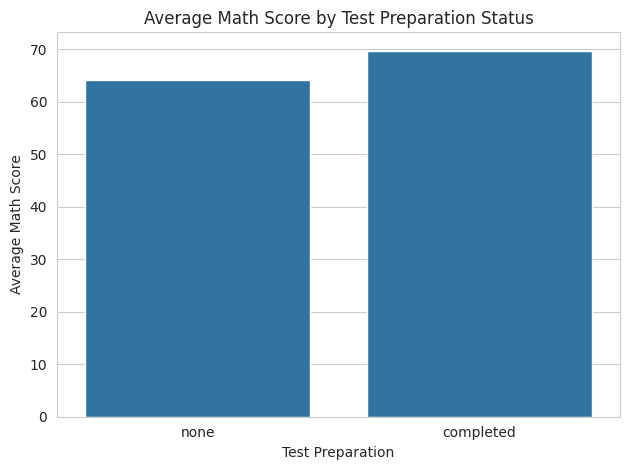

In [14]:
sns.barplot(x='test preparation course', y='math score', data=df, ci=None)
plt.title("Average Math Score by Test Preparation Status")
plt.xlabel("Test Preparation")
plt.ylabel("Average Math Score")
plt.tight_layout()
plt.show()


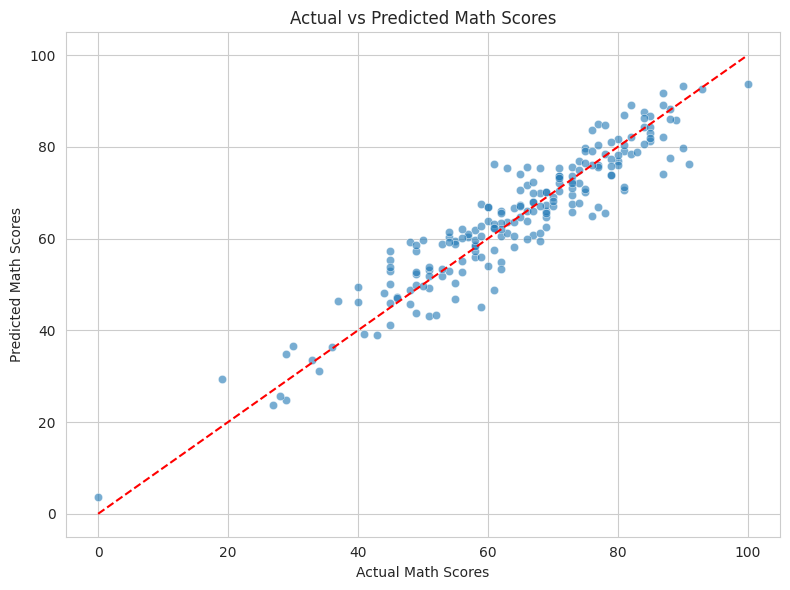

R² Score: 0.880
RMSE: 5.394
Mean Squared Error: 29.095


In [10]:
X = df.drop(columns=['math score'])
y = df['math score']

categorical_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")


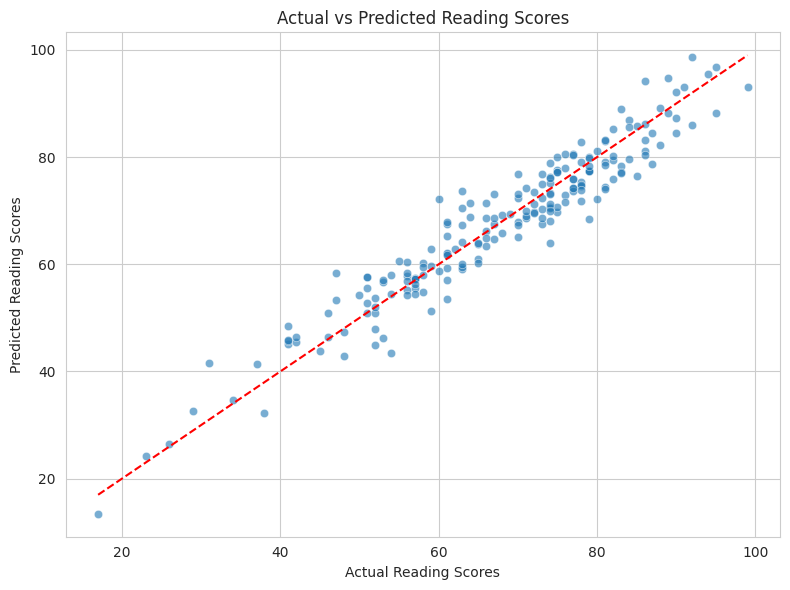

R² Score: 0.918
RMSE: 4.309
Mean Squared Error: 18.566


In [12]:
# Reading Score Prediction
X = df.drop(columns=['reading score'])
y = df['reading score']

categorical_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Reading Scores')
plt.ylabel('Predicted Reading Scores')
plt.title('Actual vs Predicted Reading Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")


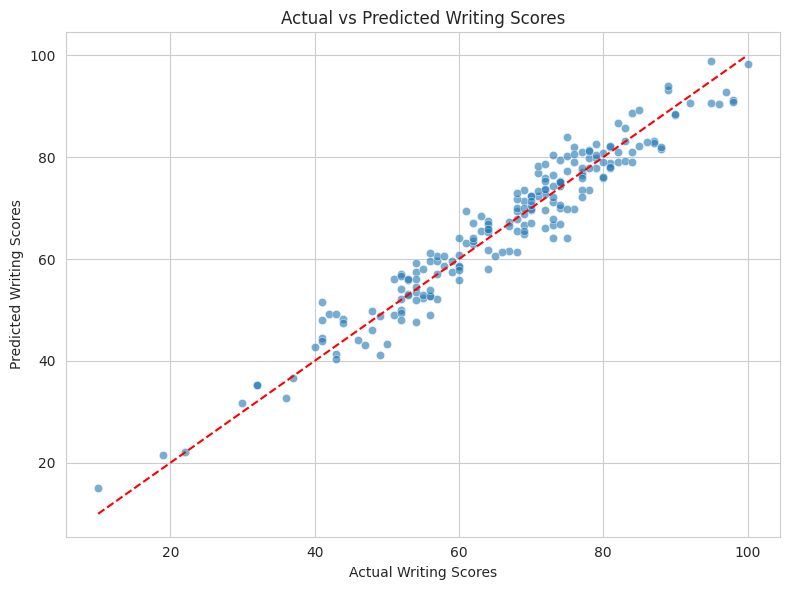

R² Score: 0.938
RMSE: 3.861
Mean Squared Error: 14.911


In [13]:
# Writing Score Prediction
X = df.drop(columns=['writing score'])
y = df['writing score']

categorical_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Writing Scores')
plt.ylabel('Predicted Writing Scores')
plt.title('Actual vs Predicted Writing Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
